In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Create the base directory 'PetImages' if it doesn't exist
if not os.path.exists('PetImages'):
    os.makedirs('PetImages')

# Create the subdirectories 'cat' and 'dog' if they don't exist
for folder_name in ('cat', 'dog'):
    folder_path = os.path.join('PetImages', folder_name)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

img_skipped=0
for folder_name in ('cat', 'dog'):
    folder_path = os.path.join('PetImages',folder_name)
    for f_name in os.listdir(folder_path):
        f_path=os.path.join(folder_path,f_name)
        try:
            f_obj=open(f_path,'rb')
            is_jfif=tf.compat.as_bytes('jfif') in f_obj.peek(10)
        finally:
            f_obj.close()
            if not is_jfif:
                img_skipped+=1
                os.remove(f_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import gradio as gr

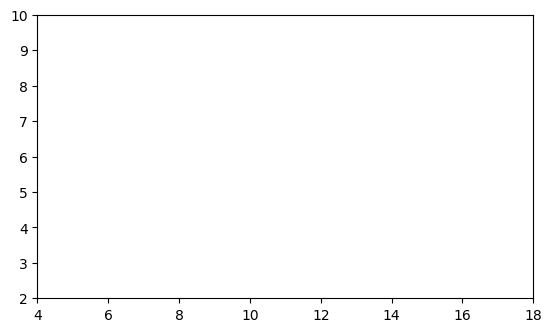

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a figure and axis
fig, ax = plt.subplots()
ax.set_xlim(4, 18)
ax.set_ylim(2, 10)
ax.set_aspect('equal')
ax.axis('on')  # Hide axes

# Define the stick figure parts as line objects
head, = ax.plot([1], [1], 'o', lw=2)  # Head as a point
body, = ax.plot([8], [8], 'k-', lw=6)  # Body
left_arm, = ax.plot([1], [1], 'k-', lw=2)
right_arm, = ax.plot([1], [1], 'k-', lw=2)
left_leg, = ax.plot([4], [4], 'k-', lw=4)
right_leg, = ax.plot([4], [4], 'k-', lw=4)

# Initialization function
def init():
    head.set_data([1], [1])
    body.set_data([8], [8])
    left_arm.set_data([1], [1])
    right_arm.set_data([1], [1])
    left_leg.set_data([4], [4])
    right_leg.set_data([4], [4])
    return head, body, left_arm, right_arm, left_leg, right_leg

# Animation function
def animate(i):
    angle = np.radians(i * 5)  # Rotate 5 degrees per frame
    cos_a, sin_a = np.cos(angle), np.sin(angle)

    # Define the stick figure in the upright position
    head_pos = np.array([0, 2])
    body_start = np.array([0, 1.5])
    body_end = np.array([0, 1])
    left_arm_end = np.array([-0.5, 1.5])
    right_arm_end = np.array([0.5, 1.5])
    left_leg_end = np.array([-0.5, 0])
    right_leg_end = np.array([0.5, 0])

    # Rotation matrix
    rotation = np.array([[cos_a, -sin_a],
                         [sin_a, cos_a]])

    # Apply rotation
    head_rot = rotation @ head_pos
    body_start_rot = rotation @ body_start
    body_end_rot = rotation @ body_end
    left_arm_end_rot = rotation @ left_arm_end
    right_arm_end_rot = rotation @ right_arm_end
    left_leg_end_rot = rotation @ left_leg_end
    right_leg_end_rot = rotation @ right_leg_end

    # Update stick figure parts
    head.set_data(head_rot[1], head_rot[1])
    body.set_data([body_start_rot[1], body_end_rot[1]],
                  [body_start_rot[8], body_end_rot[8]])
    left_arm.set_data([body_start_rot[1], left_arm_end_rot[1]],
                      [body_start_rot[2], left_arm_end_rot[2]])
    right_arm.set_data([body_start_rot[1], right_arm_end_rot[1]],
                       [body_start_rot[2], right_arm_end_rot[2]])
    left_leg.set_data([body_end_rot[2], left_leg_end_rot[2]],
                      [body_end_rot[4], left_leg_end_rot[4]])
    right_leg.set_data([body_end_rot[2], right_leg_end_rot[2]],
                       [body_end_rot[4], right_leg_end_rot[4]])

    return head, body, left_arm, right_arm, left_leg, right_leg

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init,
                    frames=72, interval=50, blit=True)

plt.show()


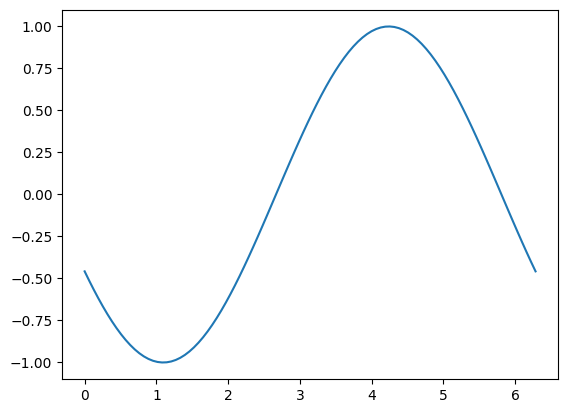

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


fig, ax = plt.subplots()
x = np.linspace(0, 2*np.pi, 100)
human, = ax.plot(x, np.sin(x))

def animate(b):
    human.set_ydata(np.sin(x + b / 10.0))  # update the data
    return human,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50, blit=True)

# Save to video (requires ffmpeg installed)
ani.save('sine_wave.mp4', writer='ffmpeg')
plt.show()